In [208]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution
c,G,Msolar,AU, pc = univeral_constants()

In [210]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
g1 = np.pi/4
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal

#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc


#---Integration settings
Tint = 1.0
fs = 1e-1

#---Info for user
status(fs, Tint)



Sampling frequency =  0.1  Hz for an observation period of  1.0  years
Total number of integration steps is  3153600.0
Frequency range is:  3.1709791983764586e-08  -  0.05  Hz


In [211]:
#Training set
import time
t0 = time.time()
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,4e-4,Tint)
numerical_motion = output[0]
constants = output[1]
t1 = time.time()
print ('The training set ran in',t1-t0 , 'seconds')
#plot_motion(numerical_motion)

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.0004  Hz and Tobs =  1.0  years
The training set ran in 1.6461360454559326 seconds


In [212]:
#Analytical solution
analytical_motion = analytical_orbital_evolution(numerical_motion,Tint, fs,constants)

extract ecc
The eccentricity fit completed in 0.03030109405517578 seconds
Extract for double trig func
Analytical orbital evolution has completed with fs =  0.1  Hz and Tobs =  1.0  years


In [213]:
#Numerical solution
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,fs,Tint)
numerical_motion = output[0]

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.1  Hz and Tobs =  1.0  years


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/tomkimpson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-216-54c4a79ec425>", line 4, in <module>
    plot_compare_motion(analytical_motion,numerical_motion)
  File "/Users/tomkimpson/PhD/PI/PI_Work/Jupyter/Code/Revised/plot.py", line 104, in plot_compare_motion
    data_to_figure(data2,ax,'C0')
  File "/Users/tomkimpson/PhD/PI/PI_Work/Jupyter/Code/Revised/plot.py", line 158, in data_to_figure
    t = data[:,0] / (365*24*3600)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tomkimpson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the a

KeyboardInterrupt: 

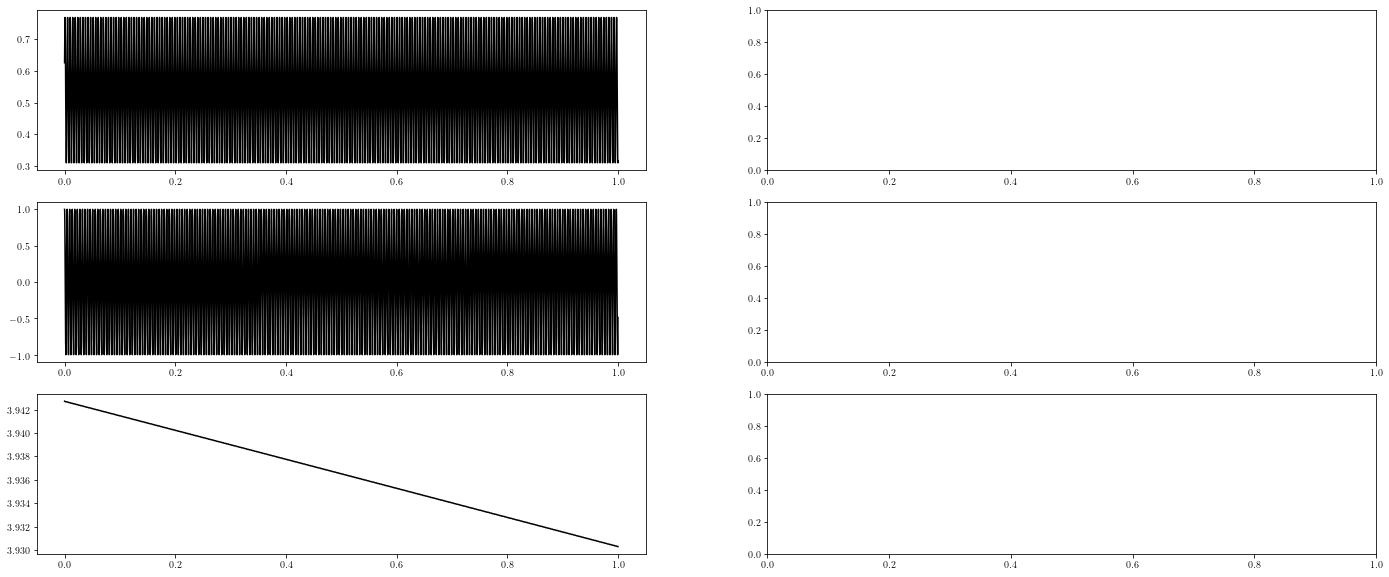

In [216]:
%matplotlib inline
from plot import *
#temp(numerical_motion)
plot_compare_motion(analytical_motion,numerical_motion)
plot_motion(analytical_motion)
plot_motion(numerical_motion)
#


In [215]:
import GravRadiation as GR
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
waveformNR = GR.Gwaves(numerical_motion, constants)
waveformAN = GR.Gwaves(analytical_motion, constants)
#plot_GW(waveformNR,f1)
#plot_GW(waveformAN,f1)

Getting the waveform


KeyboardInterrupt: 

In [ ]:
f,h1,h2, S = GR.overlap(waveformNR,waveformAN)
plot_GW_frequency(f,h1,h2, S)